In [1]:
#Initializng the necessary imports for data manipulaiton
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Making sure all rows and columns are displayed
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
#importing the database
df = pd.read_csv("Spotify_Song_Attributes.csv");
# display(df)

In [4]:
# Cleaning the data based on null values
df = df.dropna(subset=['trackName', 'artistName', 'msPlayed'])  # Drop rows without basic info
df = df.dropna(thresh=df.shape[1]-3)  # Keep only rows with less than 3 null values
df['genre'] = df['genre'].fillna('unknown') # Fill missing genres with 'unknown'
display(df)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,unknown,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.1200,0.454,136.055,audio_features,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.2330,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0


First exploration: Which genres are most popular?

(Our definition of popularity is which generes have the most total minutes played)

In [16]:
df_genre = df[df['genre'] != 'unknown'] # Dropping rows with unknown genres
df = df_genre[df_genre['msPlayed'] > 0]  # Drop rows with non-positive msPlayed values

# In order to narrow down the number of genres, we will use keywords to group them together
# Define genre mapping dictionary
genre_keywords = {
    'alternative': ['alt', 'alternative'],
    'pop': ['pop'],
    'rap': ['rap'],
    'edm': ['edm', 'electronic', 'dance'],
    'indie': ['indie'],
    'rock': ['rock'],
    'anime': ['anime'],
    'hip hop': ['hip hop', 'hip-hop'],
    'metal': ['metal'],
    'country': ['country'],
    'r&b': ['r&b', 'rnb', 'soul'],
    'jazz': ['jazz'],
    'lo-fi': ['lo-fi', 'lofi'],
    'classical': ['classic', 'classical'],
    'soundtrack': ['soundtrack', 'ost', 'video game'],
    'singer-songwriter': ['singer-songwriter', 'acoustic']
}

# Function to map genres based on keywords
def map_genre(genre_string):
    genre_lower = genre_string.lower()
    for main_genre, keywords in genre_keywords.items():
        if any(keyword in genre_lower for keyword in keywords):
            return main_genre
    return 'other'

# Apply the mapping to the genre column
df_genre['mapped_genre'] = df_genre['genre'].apply(map_genre)

df_genre_grouped = df_genre.groupby('mapped_genre')['msPlayed'].sum().reset_index() # Group by genre and sum msPlayed values
df_genre_grouped = df_genre_grouped.sort_values(by='msPlayed', ascending=False) # Sort by msPlayed in descending order
df_genre_grouped['hrsPlayed'] = df_genre_grouped['msPlayed'] / 3600000 # Convert msPlayed to hours
df_genre_grouped['hrsPlayed'] = df_genre_grouped['hrsPlayed'].round(2) # Round to 2 decimal places
df_genre_grouped = df_genre_grouped.drop(columns=['msPlayed']) # Drop the msPlayed column
df_genre_grouped = df_genre_grouped.rename(columns={'mapped_genre': 'genre'}) # Rename the column to 'genre'
df_genre_grouped = df_genre_grouped.reset_index(drop=True) # Reset the index
display(df_genre_grouped) # Display the final DataFrame with genre and hours played



,genre,hrsPlayed
0,pop,1498.65
1,alternative,530.26
2,other,453.20
3,indie,188.13
4,hip hop,148.67
5,rap,136.89
6,edm,123.21
7,singer-songwriter,115.84
8,lo-fi,90.91
9,anime,90.24


Now that we have a DataFrame that displays the most popular genres, we can use that to make a graph that shows how they compare to one another. The best graph for this situation would be a bar chart.

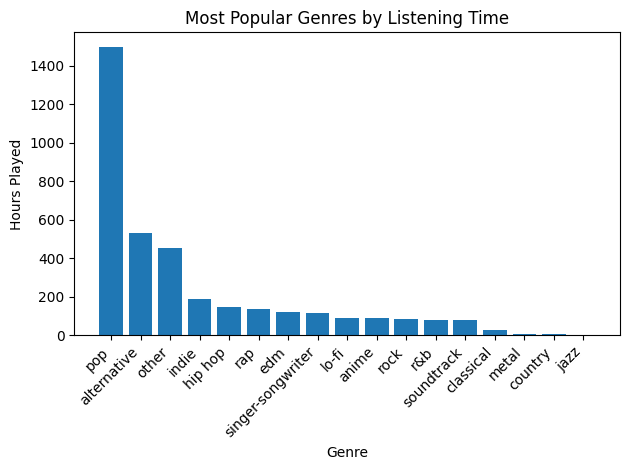

In [ ]:

# Make the plot
plt.bar(df_genre_grouped['genre'], df_genre_grouped['hrsPlayed'])

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.xlabel('Genre')
plt.ylabel('Hours Played')
plt.title('Most Popular Genres by Listening Time')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

We can see that the 'pop' category is represented much more than the others, lets explore that by breaking down the 'pop' category into sub-categories.

In this next block the data is filtered to only include genres with the word 'pop' in the name. Then the most represented pop genres (genres with 25 entries or more) are shown by popularity in terms of time played on a pie chart.

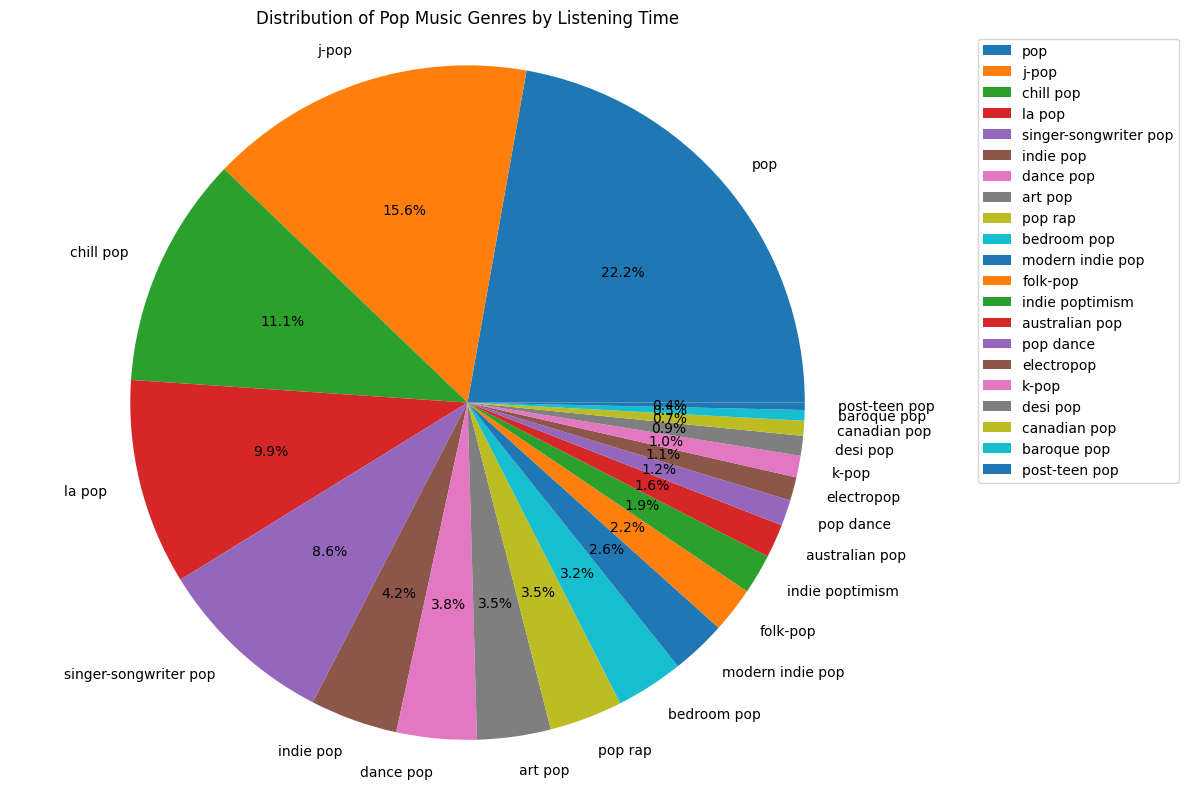

In [29]:
# Function to check if the genrename contains 'pop'
def pop_only(genre_string):
    genre_lower = genre_string.lower()
    if 'pop' in genre_lower:
        return True
    return False

# Apply the function to the genre column
df_pop = df.copy()

df_pop['pop_only'] = df_pop['genre'].apply(pop_only)

# Filter the DataFrame to include only pop songs
df_pop = df_pop[df_pop['pop_only'] == True]

# Group by genre and count entries
genre_counts = df_pop.groupby('genre').size()

# Get genres with 25 or more entries
popular_genres = genre_counts[genre_counts >= 25].index

# Filter df_pop to only include these genres
df_pop = df_pop[df_pop['genre'].isin(popular_genres)]

# Drop the temporary pop_only column
df_pop = df_pop.drop('pop_only', axis=1)

# Display the DataFrame with only pop songs
# Group by genre and calculate total hours played
df_pop_grouped = df_pop.groupby('genre')['msPlayed'].sum().sort_values(ascending=False)
df_pop_grouped = df_pop_grouped / 3600000  # Convert to hours

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(df_pop_grouped, labels=df_pop_grouped.index, autopct='%1.1f%%')
plt.title('Distribution of Pop Music Genres by Listening Time')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()





*Statistical Test #1:* 

Digging deeper, let's perform an ANOVA test to see if the mean time played of each genre are significantly different. This will tell us if any song is more likely to be popular because it is in a certain genre.

In terms of the null and alternative hypothesis, 

HO = The genre of the song doesn't have an effect on the listening time.

HA = The genre of the song has an effect on the listening time. 

In [30]:
from scipy import stats
import numpy as np

df_genre = df_genre[df_genre['mapped_genre'] != 'other']  # Drop rows with 'other' genre
genre_groups = []
for name, group in df_genre.groupby('mapped_genre'):
    values = group['msPlayed'].values  # Get numpy array of msPlayed values
    genre_groups.append(values)
genre_names = df_genre['mapped_genre'].unique()

f_statistic, p_value = stats.f_oneway(*genre_groups)

print(f'One-way ANOVA Results:')
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

One-way ANOVA Results:
F-statistic: 2.8090
p-value: 0.0002


Our p-value is 0.0002 < 0.5, therefore there are significant differences among the groups. We can draw the conclusion that the genre of a song and it's popularity/time played are correlated. We can see which genres indicate a high listening time if we just take a look at the means for each genre.

In [31]:
df_genre['minutesPlayed'] = df_genre['msPlayed'].astype(float)/60000
df_genre_mean_time = df_genre.groupby('mapped_genre')['minutesPlayed'].mean().reset_index()
df_genre_mean_time = df_genre_mean_time.sort_values(by='minutesPlayed', ascending=False)
df_genre_mean_time

,mapped_genre,minutesPlayed
14,singer-songwriter,53.466027
10,pop,34.744692
0,alternative,28.508606
6,indie,28.219629
4,edm,28.216050
5,hip hop,26.236085
12,rap,23.201966
13,rock,21.734404
9,metal,20.672557
11,r&b,19.954471


Going back to our earlier conclusion that pop is the most popular genre in terms of total time played, we can see from here that a song in the singer-songwriter genre is actually the most likely to have a high time played stat. We can also visualize this with a graph.

/var/folders/f2/t7gsgl2x3ms4twc8_5wxlmw80000gn/T/ipykernel_858/3074736991.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df_genre_mean_time, x='mapped_genre', y='minutesPlayed',


Text(0, 0.5, 'Minutes Played')

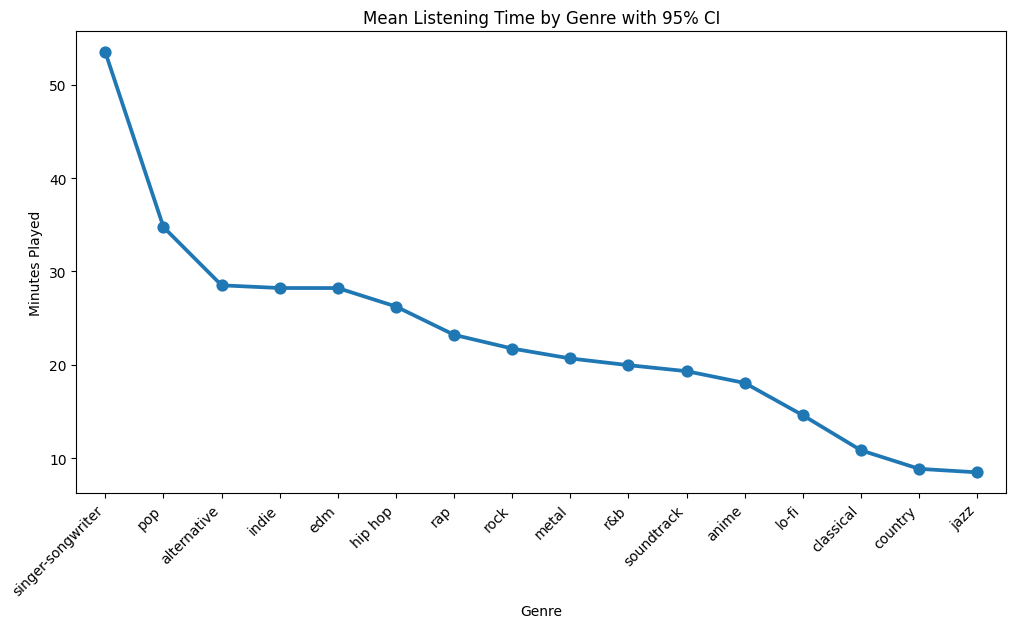

In [32]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_genre_mean_time, x='mapped_genre', y='minutesPlayed',
              ci=95, capsize=0.2)
plt.xticks(rotation=45, ha='right')
plt.title('Mean Listening Time by Genre with 95% CI')
plt.xlabel('Genre')
plt.ylabel('Minutes Played')

Now that we have looked at the relationship with the genre and listening time, we can shift to analysis other relationships. Let's start with the energy comparison between the dance pop and album rock genres. 

HO = Dance Pop and Album Rock have the same energy levels

HA = Dance Pop and Album Rock have different energy levels.

In [33]:
# Convert relevant columns to numeric
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['time_signature'] = pd.to_numeric(df['time_signature'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')

In [34]:
# Keep only relevant columns and drop rows with missing values
relevant_columns = ['trackName', 'artistName', 'genre', 'msPlayed', 'danceability', 'energy',
                    'valence', 'duration_ms', 'tempo', 'speechiness']
df_clean = df[relevant_columns].dropna()

In [35]:
# Display summary statistics
print(df_clean.describe())
print("\nUnique Genres:\n", df_clean['genre'].unique())

           msPlayed  danceability       energy      valence   duration_ms  \
count  8.524000e+03   8524.000000  8524.000000  8524.000000  8.524000e+03   
mean   1.546010e+06      0.601745     0.566079     0.435372  2.038258e+05   
std    5.575535e+06      0.158431     0.241490     0.242841  7.347258e+04   
min    8.000000e+01      0.000000     0.001080     0.000000  1.002700e+04   
25%    1.417410e+05      0.508000     0.407000     0.238000  1.629540e+05   
50%    2.732415e+05      0.622500     0.591000     0.409500  1.958800e+05   
75%    1.224504e+06      0.714000     0.752000     0.618000  2.310020e+05   
max    1.583671e+08      0.976000     0.999000     0.986000  1.847210e+06   

             tempo  speechiness  
count  8524.000000  8524.000000  
mean    119.110969     0.077917  
std      28.979390     0.077307  
min       0.000000     0.000000  
25%      97.115000     0.036100  
50%     118.899000     0.047800  
75%     139.440000     0.081100  
max     236.196000     0.777000  


T-test result: p = 0.0556


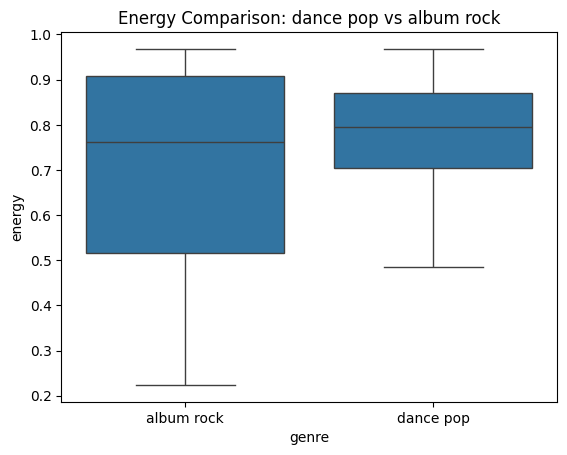

In [36]:
from scipy.stats import ttest_ind

genre1 = 'dance pop'
genre2 = 'album rock'
group1 = df_clean[df_clean['genre'] == genre1]['energy']
group2 = df_clean[df_clean['genre'] == genre2]['energy']

t_stat, p_val1 = ttest_ind(group1, group2, equal_var=False)
print(f"T-test result: p = {p_val1:.4f}")

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(data=df_clean[df_clean['genre'].isin([genre1, genre2])], x='genre', y='energy')
plt.title(f'Energy Comparison: {genre1} vs {genre2}')
plt.show()

Since the p-value calculated is greater than alpha (0.5), this means that we fail to reject the null hypothesis (dance pop and album rock have the same energy level)

Now, changing from our previous focus on genres, we can also look at the correlation between our features. We will specifcally look at the correlation between the danceability and valence (the music positiveness conveyed). 

HO = The danceability doesn't have an impact of the valence of the song.

HA = The danceability has an impact on the valence of the song.

Correlation: r = 0.49
Pearson Correlation: p = 0.00


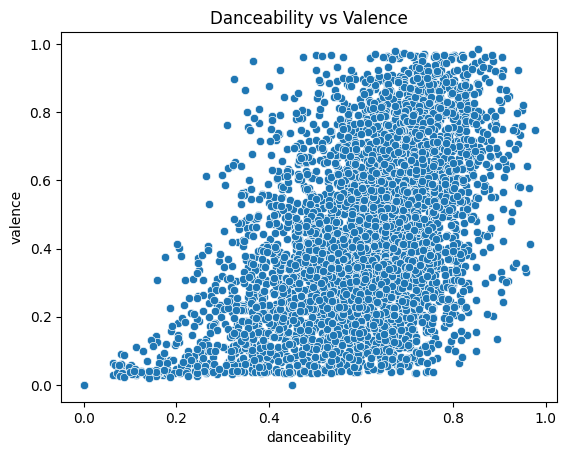

In [37]:
pearson_res = stats.pearsonr(df_clean['danceability'], df_clean['valence'])
pearson_pval = pearson_res.pvalue
corr_val = df_clean['danceability'].corr(df_clean['valence'])
print(f"Correlation: r = {corr_val:.2f}")
print(f"Pearson Correlation: p = {pearson_pval:.2f}")

# Plot
plt.figure()
sns.scatterplot(data=df_clean, x='danceability', y='valence')
plt.title('Danceability vs Valence')
plt.show()

Since the p-value is less than alpha (0.05), we reject the null hypothesis, telling us there is a correaltion between the danceability and the valence. We can also see this is a positive relationship through our calculated r. 

Next, going back to the genre, we want to look at the relationship between the genree and play level. We will define a high play level if it is played more than the median time played, and low otherwise. With these two categories, we can perform a chi-squared test.

HO = The songs in the "High" play level and "Low" play level are the same

HA = The songs in the "High" play level and "Low" play level are different. 

Chi-Squared-test result: p = 0.0000


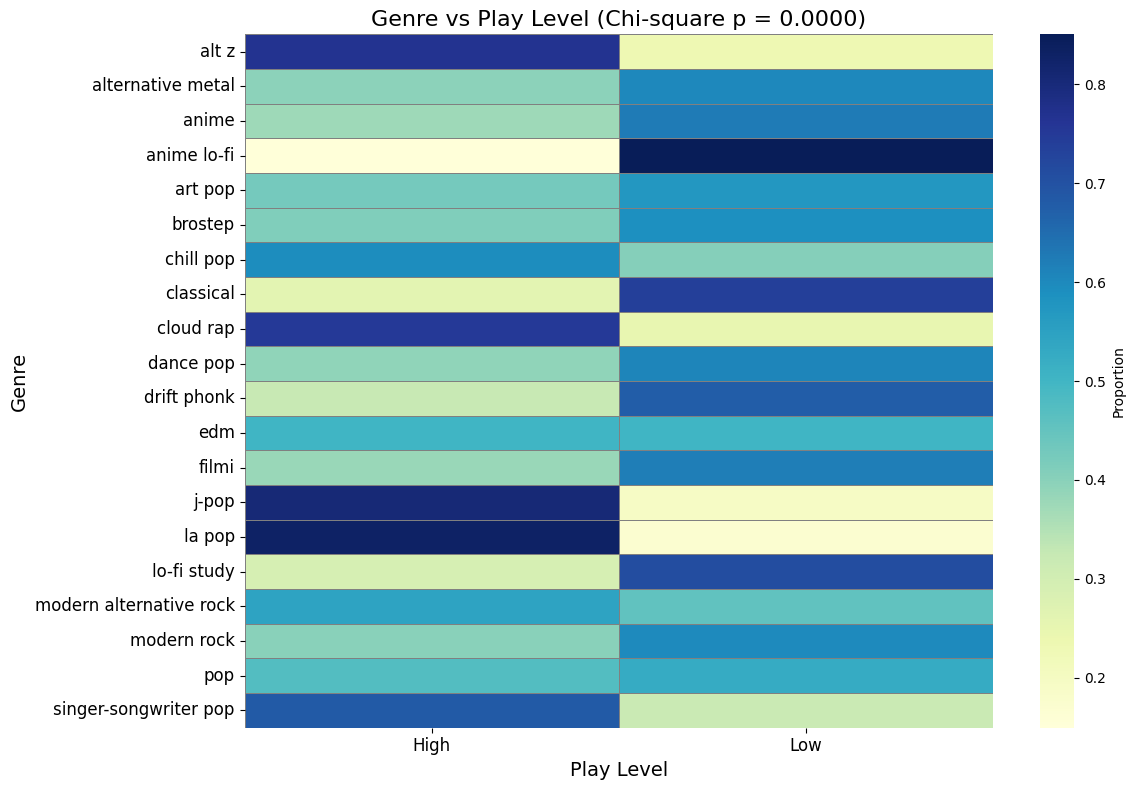

In [38]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorize play level
median_play = df_clean['msPlayed'].median()
df_clean['play_level'] = df_clean['msPlayed'].apply(lambda x: 'High' if x > median_play else 'Low')

# Keep top 20 genres
top_genres = df_clean['genre'].value_counts().head(20).index
filtered = df_clean[df_clean['genre'].isin(top_genres)]

# Contingency table and Chi-square test
genre_play = pd.crosstab(filtered['genre'], filtered['play_level'])
chi2_stat, p_val2, _, _ = chi2_contingency(genre_play)

# Normalize by row to show proportions
genre_play_norm = genre_play.div(genre_play.sum(axis=1), axis=0)
print(f"Chi-Squared-test result: p = {p_val2:.4f}")

# Plot heatmap (proportional values)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_play_norm, cmap='YlGnBu', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Proportion'})
plt.title(f'Genre vs Play Level (Chi-square p = {p_val2:.4f})', fontsize=16)
plt.xlabel('Play Level', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Notice since the p-value is less than alpha (0.5), we reject the null hypothesis, telling us there is a difference between the high and low played songs. 

To summarize the last three conclusions,

In [ ]:
print("Conclusions:")
print(f"T-test (energy): p = {p_val1:.4f} → {'Significant' if p_val1 < 0.05 else 'Not significant'} energy difference between {genre1} and {genre2}.")
print(f"Correlation (danceability vs valence): r = {corr_val:.2f} → {'Positive' if corr_val > 0 else 'Negative'} relationship.")
print(f"Chi-square (genre vs play level): p = {p_val2:.4f} → {'Significant' if p_val2 < 0.05 else 'Not significant'} relationship between genre and play level.")

Conclusions:
T-test (energy): p = 0.0556 → Not significant energy difference between dance pop and album rock.
Correlation (danceability vs valence): r = 0.49 → Positive relationship.
Chi-square (genre vs play level): p = 0.0000 → Significant relationship between genre and play level.


Finally, we will look at the mean song length and how it is distributed.

3.397


Text(0, 0.5, 'Count')

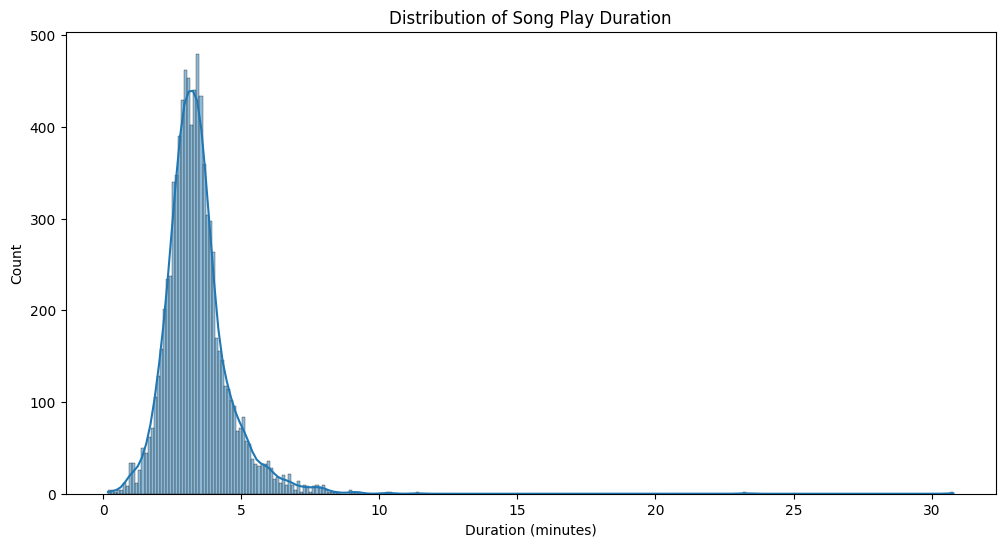

In [ ]:
df_mean_duration = df_clean.copy()
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms'].astype(float)/60000 # Convert to minutes
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms'].astype(float).round(2)  # Round to 2 decimal places
print(df_mean_duration['duration_ms'].mean().round(3)) # Display mean duration in minutes

plt.figure(figsize=(12, 6))
sns.histplot(data=df_mean_duration['duration_ms'], kde=True)
plt.title('Distribution of Song Play Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

From this graph we can see that the song duration column has a normal distribution with a mean of ~3.4 minutes.

Now that we have got a better understanding of our data and it's relationships, we can shift towards training a machine learning model to classify songs. For this, we want to be able to personalize a model for each user so we will collect our labels by randomly choosing songs from the dataset, asking the user if they know the dataset or not (labels are as follows: like - 1, dislike - 0, don't know - skip). This will then allow us to train the model specfic to the user. We will also allow the users to choose how songs they would like to rate before hand (for convenience), but we will note that a lower number of labeled songs will lead to lower model accuracy. We will also prove this through our generations. For convenience, we will store the generated data so it can be accessed again later. 

We also want to focus on comparing the power of different models, so we will be working with applying Principal Component Analysis, Decision Trees, K-Nearest Neighbors, and creating a Neural Network, and we will compare the accuracy of the different models. 

In [5]:
#IMPORTS FOR MODELS AND ANALYSIS
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [44]:
#CREATE THE DATA GENERATION PROCESS
#Temporary Dataset:
classifying_columns = ['msPlayed', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                    'valence', 'duration_ms', 'tempo', 'speechiness', 'instrumentalness', 'acousticness', 'liveness']


#Step 1: Standardize the Data
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(df[classifying_columns]), columns = classifying_columns) #Change X to be our actual data


# #Perform One Hot Encoding on the genres
df_temp = df_genre_grouped
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_genre[['mapped_genre']])
X_encoded = pd.DataFrame(encoded, columns=encoder.categories_[0])
df_final = df_temp.drop('genre', axis=1)
df_final = pd.concat([X_std, X_encoded], axis=1)

X = df_final.dropna()

Y = np.random.randint(0, 2, size=len(X))
print(X.shape)
print(Y.shape)
display(X)

(8524, 30)
(8524,)


,msPlayed,danceability,energy,key,loudness,mode,valence,duration_ms,tempo,speechiness,...,jazz,lo-fi,metal,other,pop,r&b,rap,rock,singer-songwriter,soundtrack
0,0.046675,-0.800047,-1.805890,0.491038,-1.713730,0.787348,-1.290515,-0.721384,-0.237078,-0.348200,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.251183,0.563398,1.026691,-1.187457,0.900389,-1.270087,0.303211,-0.792380,0.445206,0.505591,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.272806,0.140478,0.123909,-0.348210,-0.228499,0.787348,1.896937,-1.556003,0.064119,-0.601750,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.710097,0.146790,0.662265,1.610035,-0.528360,-1.270087,0.294975,1.042276,0.201328,-0.433579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.124114,0.273035,0.186027,0.770787,0.499386,-1.270087,0.863280,-0.807938,1.323916,0.764315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.668369,0.904260,-0.368893,1.610035,0.165186,-1.270087,0.076712,0.251730,0.584727,0.130440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,-0.157399,-0.408688,-1.752054,-0.907708,-1.577310,0.787348,-0.783982,0.258631,0.414354,-0.579759,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8521,-0.259795,-2.018311,-1.689936,0.211289,0.150737,0.787348,-0.771628,-1.241949,-1.862087,-0.605631,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8522,-0.100048,0.190976,-1.168145,1.050536,-1.020559,-1.270087,-0.936354,0.572644,0.363419,0.028244,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


For our classification, we don't care about preserving information about the features and we don't want to remove any feature completely when performing reduction. Due to this, we want to apply PCA to our model.

[0.24576629 0.34377424 0.42910503 0.50861308 0.58088106 0.65012021
 0.71438115 0.77292732 0.82613036 0.87648466 0.91181979 0.93423152
 0.95117225 0.96226385 0.97184813 0.97795434 0.98106158 0.98394757
 0.98672773 0.98912311 0.99121856 0.9932419  0.99514162 0.99694099
 0.99818966 0.99929014 0.99958811 0.99984313 1.         1.        ]


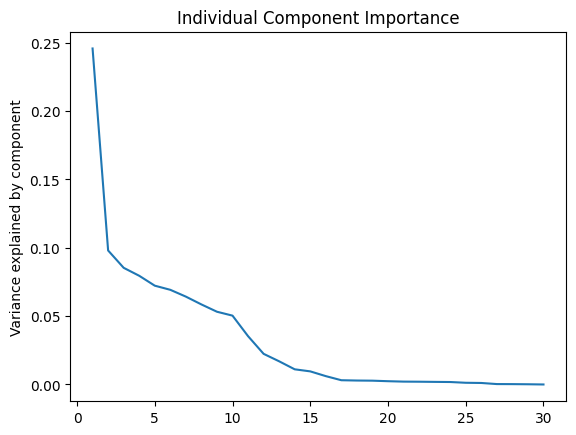

In [51]:
#Step 2: Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X)
variance_exp = pca.explained_variance_ratio_

plt.plot(range(1, len(variance_exp) + 1), variance_exp)
plt.ylabel('Variance explained by component')
plt.title('Individual Component Importance')


print(np.cumsum(variance_exp))
#Need to check the optimal amount of features and then remove that amount

In [33]:
#Split our data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

NameError: name 'X_pca' is not defined

### Decision Tree

In [ ]:
decision_tree_model = DecisionTreeClassifier()

#Training/Fitting the machine learning model
def train_model(model, X, Y):
    model.fit(X, Y)
    return model

def predict_values(model, X_train, X_test):
    Y_train = model.predict(X_train)
    Y_test = model.predict(X_test)
    return Y_train, Y_test